Número de observaciones (filas) = 768
Total de variables disponibles (columnas) = 9 
Columnas que cuentan con un valor nulo -
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    

Modelo y scaler guardados.


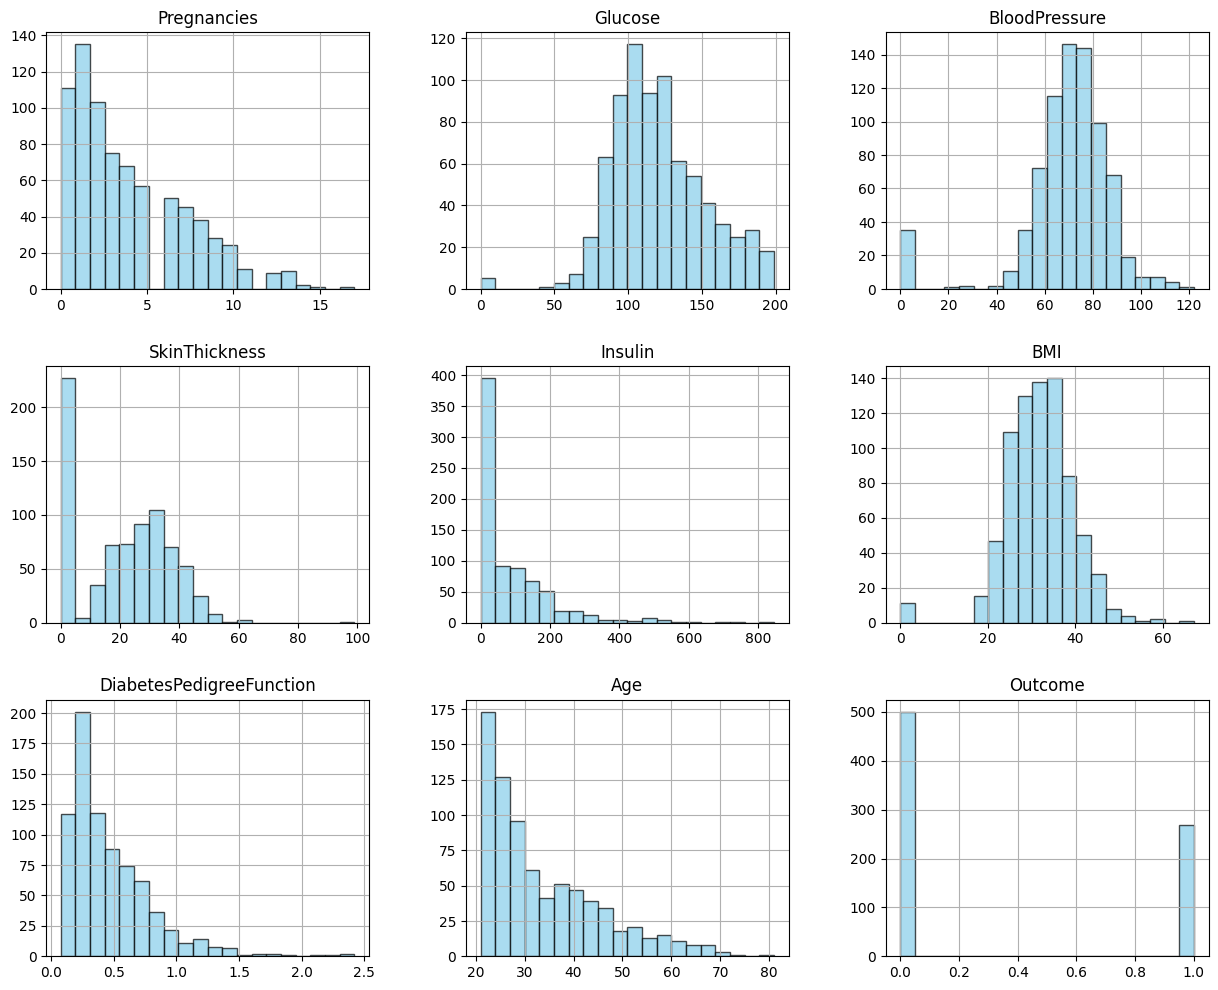

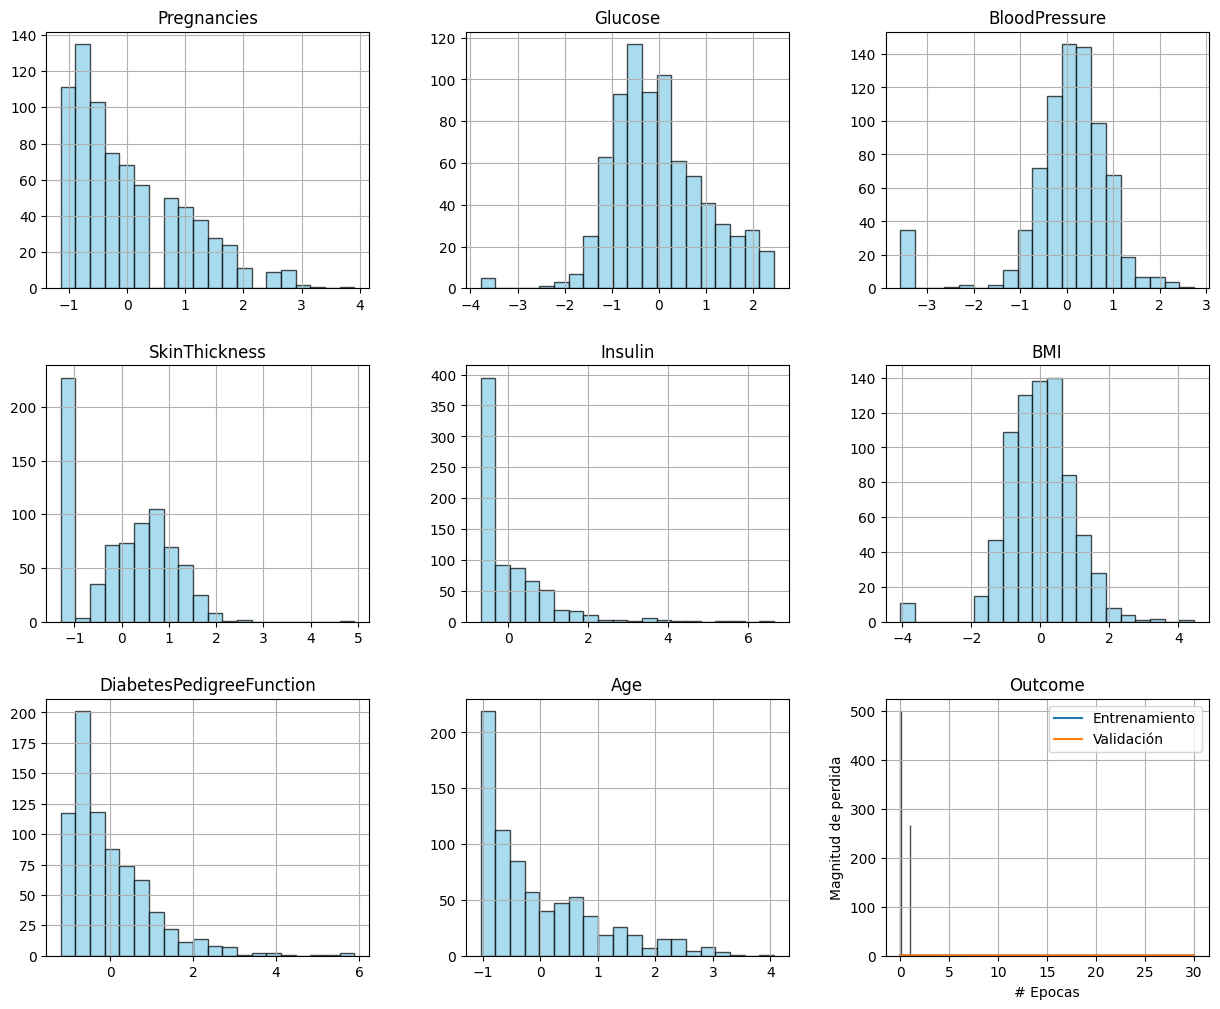

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
El resultado es: 0.9536360502243042


In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold  # Se agregó
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Se agregó

df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 26/diabetes.csv')
df2 = df.copy()

print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

df2.info()

# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Pregnancies')
axes[0, 1].set_title('Glucose')
axes[0, 2].set_title('BloodPressure')
axes[1, 0].set_title('SkinThickness')
axes[1, 1].set_title('Insulin')
axes[1, 2].set_title('BMI')
axes[2, 0].set_title('DiabetesPedigreeFunction')
axes[2, 1].set_title('Age')
axes[2, 2].set_title('Outcome')

# Definir características numéricas y categóricas
numeric_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Pregnancies')
axes[0, 1].set_title('Glucose')
axes[0, 2].set_title('BloodPressure')
axes[1, 0].set_title('SkinThickness')
axes[1, 1].set_title('Insulin')
axes[1, 2].set_title('BMI')
axes[2, 0].set_title('DiabetesPedigreeFunction')
axes[2, 1].set_title('Age')
axes[2, 2].set_title('Outcome')

df2.head()

# Definir X e y
X = df2.drop(columns=['Outcome'])
y = df2['Outcome']

# Definir la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Se agregó

# Variables para almacenar las métricas
accuracies = []  # Se agregó
precisions = []  # Se agregó
recalls = []  # Se agregó
f1s = []  # Se agregó

# Entrenamiento y validación cruzada
for train_index, val_index in kf.split(X, y):  # Se agregó
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]  # Se agregó
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]  # Se agregó
    
    oculta  = tf.keras.layers.Dense(units=32,activation='relu',input_shape=[8])
    dropout = tf.keras.layers.Dropout(0.3)
    oculta1 = tf.keras.layers.Dense(units=16,activation='relu')
    dropout1 = tf.keras.layers.Dropout(0.3)
    salida  = tf.keras.layers.Dense(units=1,activation='sigmoid')
    modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])
    modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
    
    # Implementar el early_stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
    # Entrenar el modelo
    print('Comenzando entrenamiento')
    historial = modelo.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])
    print('Modelo entrenado')

    # Evaluar el modelo en el conjunto de validación
    y_val_pred = (modelo.predict(X_val) > 0.5).astype(int)  # Se agregó
    accuracies.append(accuracy_score(y_val, y_val_pred))  # Se agregó
    precisions.append(precision_score(y_val, y_val_pred))  # Se agregó
    recalls.append(recall_score(y_val, y_val_pred))  # Se agregó
    f1s.append(f1_score(y_val, y_val_pred))  # Se agregó

# Resultados de la validación cruzada
print(f'Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}')  # Se agregó
print(f'Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}')  # Se agregó
print(f'Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}')  # Se agregó
print(f'F1 Score: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}')  # Se agregó

# Entrenamiento final en todo el conjunto de datos
oculta  = tf.keras.layers.Dense(units=32,activation='relu',input_shape=[8])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida  = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
historial = modelo.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])

# Guardar el modelo y el scaler
modelo.save('modelo_diabetes.h5')  # Se agregó
joblib.dump(scaler, 'scaler_diabetes.pkl')  # Se agregó
print('Modelo y scaler guardados.')  # Se agregó

plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])
plt.show()

# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10,10,50 ]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :8] = scaler.transform(nuevo_dato[:, :8])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)